# Data Cleaning

In [31]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("abhikjha/movielens-100k")

# Define the path to the subdirectory
subdir_path = os.path.join(path, "ml-latest-small")

# Load the data into DataFrames
movies = pd.read_csv(os.path.join(subdir_path, "movies.csv"))
ratings = pd.read_csv(os.path.join(subdir_path, "ratings.csv"))
tags = pd.read_csv(os.path.join(subdir_path, "tags.csv"))
links = pd.read_csv(os.path.join(subdir_path, "links.csv"))


In [2]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [6]:
# Split genres into individual columns
genres = movies['genres'].str.get_dummies(sep='|')
movies = pd.concat([movies, genres], axis=1)
movies.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Let's drop the timestamp column since we won't need it

In [10]:
ratings = ratings.drop(columns=['timestamp'])
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [11]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [12]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [13]:
tags.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

Let's drop the `timestamp` column

In [14]:
# Drop the 'timestamp' column
tags = tags.drop(columns=['timestamp'])
tags.head()

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA


In [15]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [39]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


We don't need `link.csv`

# Descriptive statistics & Plots

In [16]:
movies.describe()

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,...,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000
mean,42200.353623,0.003490,0.187641,0.129645,0.062718,0.068158,0.385547,0.123075,0.045165,0.447649,...,0.008930,0.100390,0.016218,0.034285,0.058817,0.163827,0.100595,0.194416,0.039212,0.017142
std,52160.494854,0.058976,0.390445,0.335930,0.242468,0.252031,0.486749,0.328541,0.207677,0.497277,...,0.094083,0.300535,0.126321,0.181968,0.235295,0.370137,0.300808,0.395771,0.194108,0.129808
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3248.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,76232.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,193609.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
ratings.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [18]:
tags.describe()

,userId,movieId
count,3683.000000,3683.000000
mean,431.149335,27252.013576
std,158.472553,43490.558803
min,2.000000,1.000000
25%,424.000000,1262.500000
50%,474.000000,4454.000000
75%,477.000000,39263.000000
max,610.000000,193565.000000


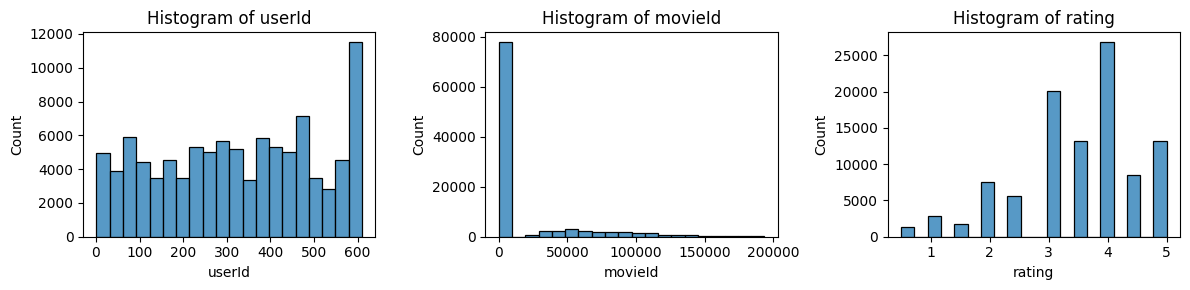

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features
num_features = ratings.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create a figure with subplots for each numerical feature
fig, axes = plt.subplots(nrows=1, ncols=len(num_features), figsize=(12, 3))

# Plot histograms for each numerical feature using seaborn
for i, feature in enumerate(num_features):
    sns.histplot(ratings[feature], bins=20, kde=False, ax=axes[i], edgecolor='black')
    axes[i].set_title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()


C:\Users\songt\AppData\Local\Temp\ipykernel_8056\3245642831.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Count', data=genre_counts, palette='viridis')


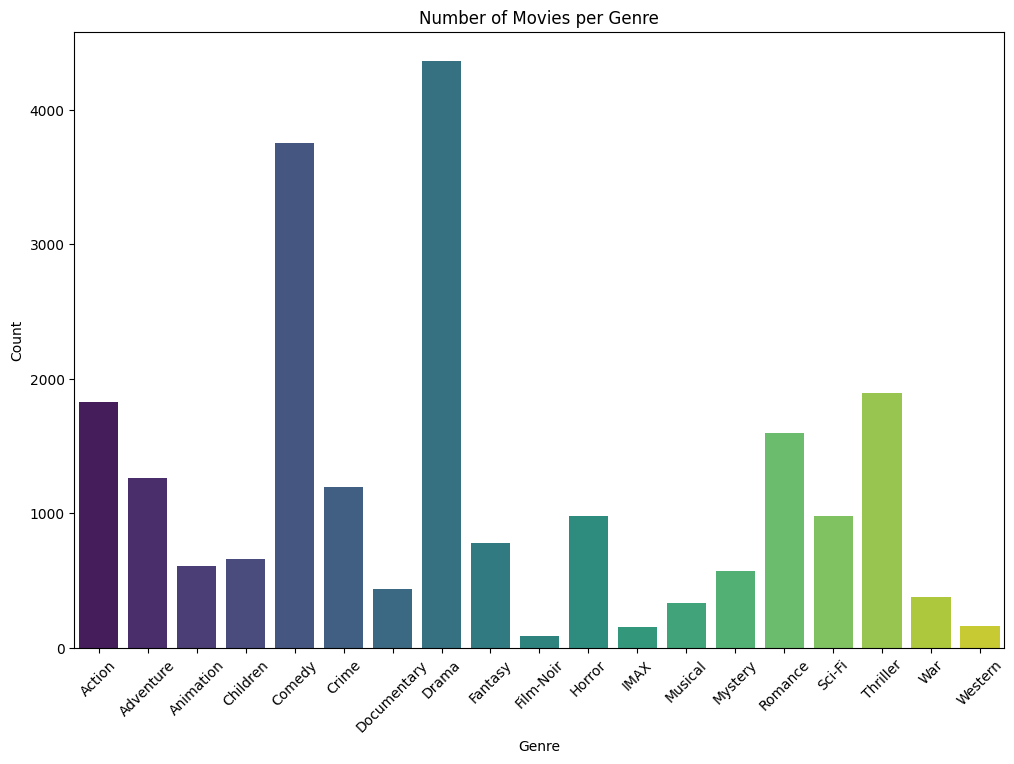

In [20]:
# Sum up the number of movies per genre
genre_counts = genres.sum().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Drop the '(no genres listed)' column if it exists
genre_counts = genre_counts[genre_counts['Genre'] != '(no genres listed)']

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Genre', y='Count', data=genre_counts, palette='viridis')
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\songt\AppData\Local\Temp\ipykernel_8056\465012214.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_users['userId'].astype(str), y=top_10_users['rating_count'], palette='viridis')


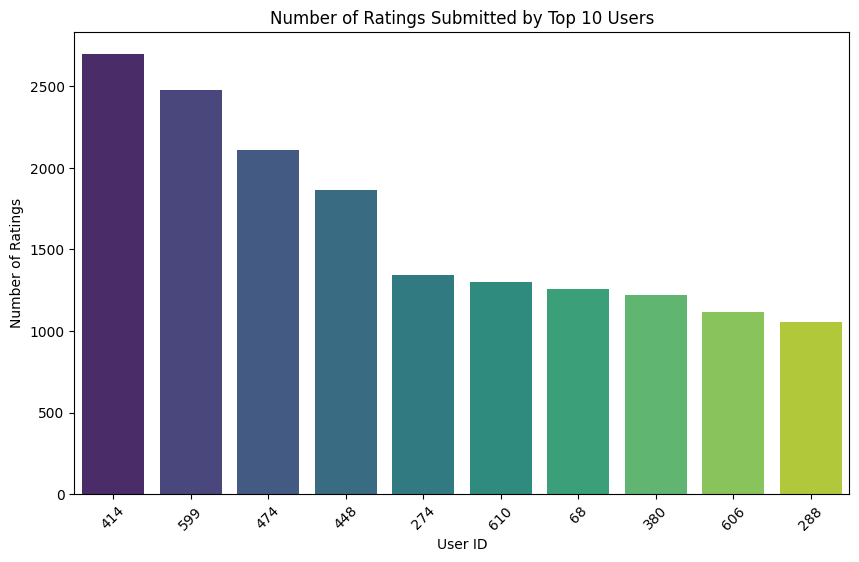

In [21]:
# Count the number of ratings per user
ratings_count = ratings.groupby('userId').size().reset_index(name='rating_count')

# Get the top 10 most active users
top_10_users = ratings_count.nlargest(10, 'rating_count')

# Plot the bar chart for the top 10 most active users using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_users['userId'].astype(str), y=top_10_users['rating_count'], palette='viridis')
plt.title('Number of Ratings Submitted by Top 10 Users')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()


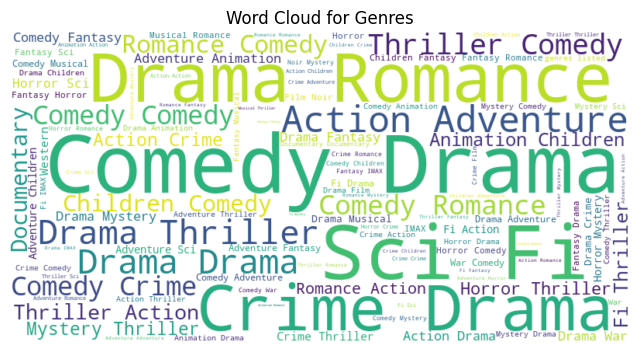

In [22]:
from wordcloud import WordCloud

# Combine text fields into a single string
text = ' '.join(movies['genres'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Genres')
plt.axis('off')
plt.show()


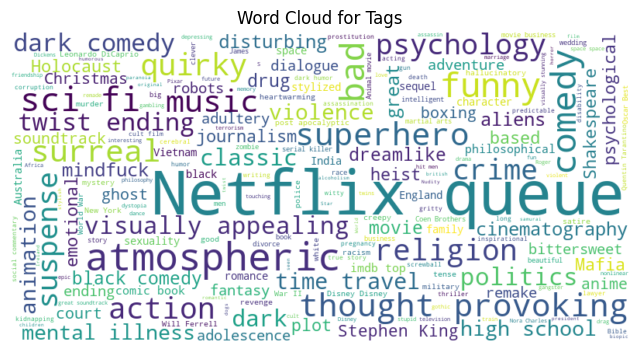

In [23]:
# Combine text fields into a single string
text = ' '.join(tags['tag'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Tags')
plt.axis('off')
plt.show()


In [24]:
# Count the number of ratings for each movie
movie_ratings_count = ratings.groupby('movieId').size().reset_index(name='count')

# Merge with the movies DataFrame to get movie titles
movie_ratings_count = movie_ratings_count.merge(movies[['movieId', 'title']], on='movieId')

# Sort by the number of ratings in descending order
movie_ratings_count = movie_ratings_count.sort_values(by='count', ascending=False)

# Get the top 20 most popular movies
top_20_popular_movies = movie_ratings_count.head(20)

# Display the top 20 movies
top_20_popular_movies[['title', 'count']]


,title,count
314,Forrest Gump (1994),329
277,"Shawshank Redemption, The (1994)",317
257,Pulp Fiction (1994),307
510,"Silence of the Lambs, The (1991)",279
1938,"Matrix, The (1999)",278
224,Star Wars: Episode IV - A New Hope (1977),251
418,Jurassic Park (1993),238
97,Braveheart (1995),237
507,Terminator 2: Judgment Day (1991),224
461,Schindler's List (1993),220


# Hypotheses

### Hypothesis 1: Higher-rated movies tend to have more tags associated with them

In [25]:
# Combine ratings and tags data
ratings_tags = pd.merge(ratings, tags, on='movieId', how='left')

# Group by movieId and calculate the mean rating and tag count
movie_stats = ratings_tags.groupby('movieId').agg({'rating': 'mean', 'tag': 'count'}).reset_index()
movie_stats.rename(columns={'tag': 'tag_count'}, inplace=True)


In [26]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation between rating and tag count
correlation, p_value = pearsonr(movie_stats['rating'], movie_stats['tag_count'])
print(f"Correlation between rating and tag count: {correlation}, p-value: {p_value}")


Correlation between rating and tag count: 0.03256721629540192, p-value: 0.0013185866498305028


### Hypothesis 2: Users who rate more movies also use more tags

In [27]:
# Group by userId and count ratings and tags
user_stats = ratings.groupby('userId').size().reset_index(name='rating_count')
tag_stats = tags.groupby('userId').size().reset_index(name='tag_count')

# Merge the two datasets
user_stats = pd.merge(user_stats, tag_stats, on='userId', how='left').fillna(0)


In [28]:
# Calculate the Pearson correlation between rating count and tag count
correlation, p_value = pearsonr(user_stats['rating_count'], user_stats['tag_count'])
print(f"Correlation between rating count and tag count: {correlation}, p-value: {p_value}")


Correlation between rating count and tag count: 0.35793632751652016, p-value: 7.08546271321085e-20


### Hypothesis 3: Movies in the Action genre have higher average ratings compared to those in the Drama genre

In [29]:
# Filter movies by genres Action and Drama
action_movies = movies[movies['genres'].str.contains('Action')]['movieId']
drama_movies = movies[movies['genres'].str.contains('Drama')]['movieId']

# Get ratings for Action and Drama movies
action_ratings = ratings[ratings['movieId'].isin(action_movies)]
drama_ratings = ratings[ratings['movieId'].isin(drama_movies)]


In [30]:
from scipy.stats import ttest_ind

# Perform a t-test to compare average ratings
t_stat, p_value = ttest_ind(action_ratings['rating'], drama_ratings['rating'])
print(f"T-test between Action and Drama movie ratings: t-statistic = {t_stat}, p-value = {p_value}")


T-test between Action and Drama movie ratings: t-statistic = -27.4242011041896, p-value = 9.827740357172815e-165
